In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as image

NAMES = ['wb97x', 
         'ani2x_mm', 'ani2x_emle_static', 'ani2x_emle_total', 
         'delta_mm', 'delta_emle_static', 'delta_emle_total',]

In [2]:
def get_shift(x, y, z):
    x0, y0 = -82.5, -12.5 # Position of global minimum
    xy = np.array([x, y]).T
    diff = np.abs(xy - np.array([x0, y0]))
    sum_diff = np.sum(diff, axis=1)
    idx = np.argmin(sum_diff) # idx of global minimum
    return z[idx]

def read_pmf(filename):
    return np.loadtxt(filename).T[:3]

def shift_pmf(pmf):
    x, y, z = pmf
    return np.array([x, y, z - get_shift(x, y, z)])

In [3]:
full_data = {name: shift_pmf(read_pmf(f'data/{name}.PMF')) for name in NAMES}
mask = np.mean(np.array([v[2,:] for v in full_data.values()]), axis=0) < 1000
masked_data = {k: v[:,mask] for k, v in full_data.items()}

In [4]:
pmf_data = {k: v.reshape(3, 72, 72) for k, v in full_data.items()}

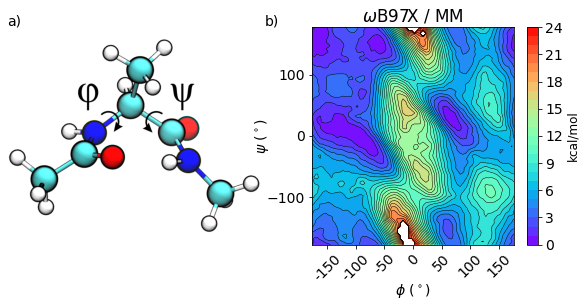

In [5]:
x, y, z = pmf_data['wb97x']
levels = np.arange(0, 25)

plt.rc('figure', facecolor='w')
plt.rc('font', size=14)

fig, (ax_img, ax_pmf) = plt.subplots(1, 2, figsize=(10, 4))

ax_img.xaxis.set_visible(False)
ax_img.yaxis.set_visible(False)
ax_img.set_frame_on(False)
img = image.imread(f'data/adp_3D.png')
ax_img.imshow(img)

cp = ax_pmf.contourf(x, y, z, cmap='rainbow', levels=levels)
ax_pmf.contour(x, y, z, levels=levels, colors='black', linewidths=0.5)
ax_pmf.set_xlabel("$\phi$ ($^\circ$)", fontsize=14, labelpad=-2)
ax_pmf.set_ylabel("$\psi$ ($^\circ$)", fontsize=14, labelpad=-5)
x_ticks = np.arange(-150, 151, 50)
ax_pmf.set_xticks(x_ticks, x_ticks, rotation=45)
ax_pmf.set_title("$\omega$B97X / MM")
cbar = plt.colorbar(cp)
cbar.set_label("kcal/mol", size=12)

ax_img.text(0, -67, 'a)', fontsize=14)
ax_pmf.text(-260, 180, 'b)', fontsize=14)

plt.savefig('Fig1.png', dpi=300, bbox_inches='tight')
plt.show()